Start: 280.80, End: 124.80, Length:156.00
Bottom: 95.26, Top: 204.74, Width:109.49


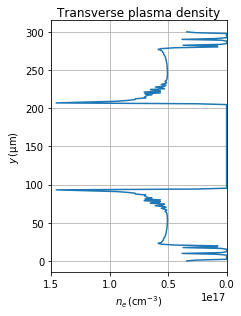

In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
e = const.physical_constants['elementary charge'][0]

pathPre = '/media/robert/Data_Storage/VSim/Matched-Accelerating-Gradient/3DConvergence_Tests/'
simName = 'AccelGradient'

def find_length(rhoX, x, Nx):
    eps = 1e6
    for i in range(Nx-1, -1, -1):
        if rhoX[i] >= eps and rhoX[i-1] < eps:
            start = x[i-1]
        if rhoX[i] <= eps and rhoX[i-1] > eps:
            end = x[i]
            return start, end

def find_width(rhoY, y, Ny):
    eps = 1e6
    for i in range(int(Ny/4), int(3*Ny/4)):
        if rhoY[i] >= eps and rhoY[i+1] < eps:
            start = y[i+1]
        if rhoY[i] <= eps and rhoY[i+1] > eps:
            end = y[i]
            return start, end

# Plotting the plasma density
path = pathPre + '5e16PlasmaDensity/InitialWakeSize/'
rho, rhoAttrs = load.load_field(path, simName, 'rhoPlasma')
Nx, Ny, Nz = analyze.get_shape(rho[5])
rhoX = -rho[5][:, int(Ny+1)/2, int(Nz+1)/2, 0]/e/1e6
rhoY = -rho[5][175, :, int(Nz+1)/2, 0]/e/1e6
x = np.linspace(0, 300, Nx)
y = np.linspace(0, 300, Ny)

length = find_length(rhoX, x, Nx)
print('Start: %0.2f, End: %0.2f, Length:%0.2f' % (length[0], length[1], length[0]-length[1]))

widthArr = np.zeros(50, dtype='double')
for i in range(150, 200):
    rhoYi = -rho[5][i, :, int(Nz+1)/2, 0]/e/1e6
    width = find_width(rhoYi, y, Ny)
    widthArr[i-150] = width[1]-width[0]
rhoY = -rho[5][np.argmax(widthArr)+150, :, int(Nz+1)/2, 0]/e/1e6
    
width = find_width(rhoY, y, Ny)
print('Bottom: %0.2f, Top: %0.2f, Width:%0.2f' % (width[0], width[1], width[1]-width[0]))

plt.figure(figsize=(3.5,4.5))
plt.plot(rhoY, y)
plt.title('Transverse plasma density')
#plt.plot([-0.2e17, 2e17], [width[0], width[0]], 'm--')
#plt.plot([-0.2e17, 2e17], [width[1], width[1]], 'm--')

plt.ylabel(r'$y\,(\mathrm{\mu m})$')
plt.xlabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.xlim([0.0e17, 1.5e17])
plt.gca().invert_xaxis()
plt.grid(True)
plt.tight_layout()
plt.savefig('transverseN.svg')
plt.show()

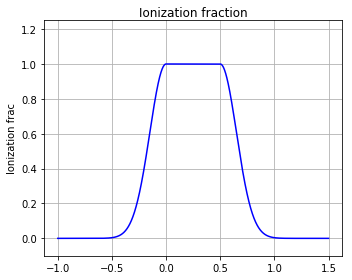

In [26]:
import sys
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from lens import profile
from ionization import ionization
# Create the desired intensity profile
z0 = 0.75e6
zf = 2e6
dz = 0.5e6
sigmaIn = 15e4
sigmaOut = 15e4
N = 5000
z0 = 1e6
zf = 2.5e6
dz = 0.5e6
d1 = 0.0
d2 = z0
d3 = z0 + dz
if zf is not 0:
    d4 = zf
else:
    d4 = d3+10*sigmaOut
Z = d4 - d1
z = np.linspace(d1, d1+Z, N)
# Create the density profile
frac = np.zeros(N)
peak = 1
sel = z <= d2
frac[sel] = peak*np.exp(-(z[sel]-d2)**2/(2*sigmaIn**2))
sel = np.array(z > d2) * np.array(z < d3)
frac[sel] = peak
sel = z >= d3
frac[sel] = peak*np.exp(-(z[sel]-d3)**2/(2*sigmaOut**2))
ion = {'atom' : ionization.Ar,
       'tau' : 35,
       'type' : 'gaussian'}

plt.figure(figsize=(5, 4))

plt.plot(z/1e6-1, frac, 'b')
plt.ylabel('Ionization frac')
plt.ylim([-.1, 1.25])
plt.xlim
plt.grid(True)
plt.title('Ionization fraction')

plt.tight_layout()
plt.savefig('LongitudinalN.svg')
plt.show()

omega: 2.355e+15
f    : 374.74 THz
E0   : 641.04 GV/m
n*   : 0.9292
Cnl2 : 4.1156
hw   : 1.5498 eV


/home/robert/anaconda3/envs/CU-PWFA/lib/python3.6/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in sqrt


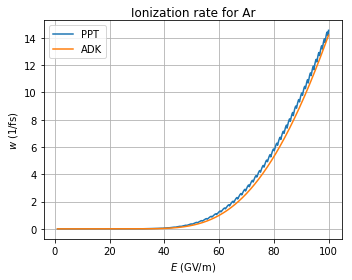

In [4]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.constants as const
from scipy.special import dawsn
from scipy.special import gamma
from ionization import adk

c = const.physical_constants['speed of light in vacuum'][0]
me = const.physical_constants['electron mass'][0]
e = const.physical_constants['elementary charge'][0]
hbar = const.physical_constants['Planck constant over 2 pi'][0]
alpha = const.physical_constants['fine-structure constant'][0]

# Lets start with Argon
xi = 15.7596 # eV - ionization energy
Z = 1        # atomic residue
l = 1        # orbital angular momentum quantum number
lam = 0.8    # um - laser wavelength
# First, calculate all the parameters that depend only on the species being ionized
w = 2*np.pi*c / (lam * 1e-6)
E0 = (2*xi)**1.5 * np.sqrt(me*e) / hbar
n = alpha*c*Z*np.sqrt(me/(2*e*xi))
f = 2*l + 1
C2 = 4**n / (n*gamma(2*n))

print('omega: %.3e' % w)
print('f    : %.2f THz' % (w/1e12/2/np.pi,))
print('E0   : %.2f GV/m' % (E0/1e9))
print('n*   : %.4f' % n)
print('Cnl2 : %.4f' % C2)
print('hw   : %.4f eV' % (hbar*w/e))
E = np.linspace(1e9, 100e9, 1000)
gamma  = (w/E) * np.sqrt(2*me*xi/e)
gammac = np.sqrt(E0/(n*E))
alpha  = 2*(np.arcsinh(gamma) - gamma/np.sqrt(1+gamma**2))
beta   = 2*gamma / np.sqrt(1+gamma**2)
g      = 3/(2*gamma) * ((1+1/(2*gamma**2))*np.arcsinh(gamma) - np.sqrt(1+gamma**2)/(2*gamma))
v      = e*xi/(hbar*w) * (1+1/(2*gamma**2))

Apre = 4*gamma**2/(np.sqrt(3*np.pi)*(1+gamma**2))
def An(n):
    ret =  np.exp(-alpha*(n-v))*dawsn(np.sqrt(beta*(n-v)))
    ret[n < v] = 0.0
    return ret
Asum = An(11)
for i in range(180):
    Asum += An(12+i)
    
# Put it all together to find the ionization rate
ratePPT = C2*e/hbar*np.sqrt(6/np.pi)*(2*l+1)*xi \
          *(2*E0/E)**(2*n-1.5)*(1+gamma**2)**0.75 \
          *Apre*Asum*np.exp(-2*E0*g/(3*E))/1e15
        
rateADK = C2*e/hbar*np.sqrt(6/np.pi)*(2*l+1)*xi \
          *(2*E0/E)**(2*n-1.5)*np.exp(-2*E0/(3*E))/1e15

# This is jus a sanity check but it is indeed the same as rateADK
rateADK2 = adk.rate_linear(xi, E/1e9, 1, 1, 0)

ratePPTCC = ratePPT * (1 + 2*gamma/np.exp(1))**(-2*n)

plt.figure(figsize=(5,4))
plt.plot(E/1e9, ratePPT, E/1e9, rateADK)
plt.title(r'Ionization rate for Ar')
plt.xlabel(r'$E$ (GV/m)')
plt.ylabel(r'$w$ (1/fs)')
plt.legend(['PPT', 'ADK'])
plt.grid(True)
plt.tight_layout()
plt.savefig('PPTvADK.svg')
plt.show()

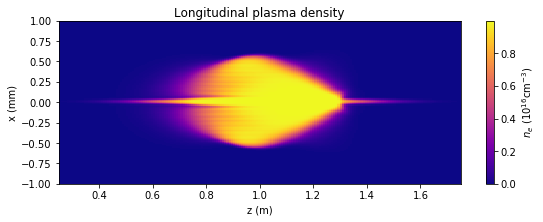

In [28]:
path = '/media/robert/Data_Storage/Data/Ionization/SphericalAndRamp/SecondAttempt_Sweeps/elements/element_E0-250_waist-150_SPlasma/'
pre = 'E0-250_waist-150_SPlasma'
Nz = 2**8
Nx = 2**11
Ny = 2**11
X = 3e4
Y = 3e4
Z = 2.0e6
ne = np.zeros((Nz, Nx))
def load_plasma_density(ind):
    ne = np.load(path + pre + '_plasmaDensity_' + str(ind) + '.npy')
    return ne

for i in range(0, Nz-1):
    ne[i, :] = load_plasma_density(i)
        
plt.figure(figsize=(9,3))
ne = np.flipud(np.transpose(ne))*10
im = plt.imshow(ne, aspect='auto', extent=[0, Z/1e6, -X/2000, X/2000])
cb = plt.colorbar()
cb.set_label(r'$n_e$ ($\mathrm{10^{16}cm^{-3}}$)')
plt.set_cmap('plasma')
plt.xlabel(r'z (m)')
plt.ylabel(r'x (mm)')
plt.ylim([-1, 1])
plt.xlim([0.25, 1.75])
plt.title('Longitudinal plasma density')
plt.savefig('SphericalPlasma.svg')
plt.show()

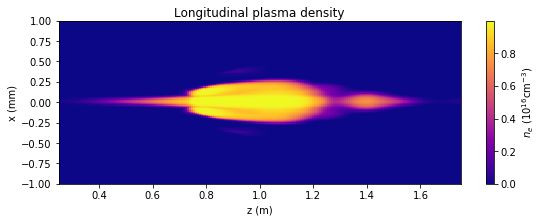

In [29]:
path = path = '/media/robert/Data_Storage/Data/Ionization/MultizoneBeamCombining/FirstAttempt/elements/element_Plasma0/'
pre = 'Plasma0'
Nz = 2**8
Nx = 2**11
Ny = 2**11
X = 3e4
Y = 3e4
Z = 2.0e6
ne = np.zeros((Nz, Nx))
def load_plasma_density(ind):
    ne = np.load(path + pre + '_plasmaDensity_' + str(ind) + '.npy')
    return ne

for i in range(0, Nz-1):
    ne[i, :] = load_plasma_density(i)
        
plt.figure(figsize=(9,3))
ne = np.flipud(np.transpose(ne))*10
im = plt.imshow(ne, aspect='auto', extent=[0, Z/1e6, -X/2000, X/2000])
cb = plt.colorbar()
cb.set_label(r'$n_e$ ($\mathrm{10^{16}cm^{-3}}$)')
plt.set_cmap('plasma')
plt.xlabel(r'z (m)')
plt.ylabel(r'x (mm)')
plt.ylim([-1, 1])
plt.xlim([0.25, 1.75])
plt.title('Longitudinal plasma density')
plt.savefig('BesselPlasma.svg')
plt.show()